## Μέρος 2 : Υλοποίηση αλγορίθμου

In [3]:
import cv2
import numpy as np

**Ερώτημα 1:**

In [3]:
# Create a VideoCapture object and read from input file
cap = cv2.VideoCapture("VIRAT_S_000201_04_000682_000822.mp4")
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

#set new height and width
height = int(height//2)
width=int(width//2)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('output.mp4',fourcc, 20.0, (width,height))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.resize(frame, (width, height))
        # write the resized frame
        out.write(frame)

#         cv2.imshow('frame',frame)
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break
    else:
        break

# Release everything at the end
cap.release()
out.release()

**Ερώτημα 2:**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks,corner_shi_tomasi
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse

*Ανιχνευτής γωνιών Harris*

In [4]:
#We want the first frame of the new video
video = cv2.VideoCapture('output.mp4')
ret, first_image = video.read()

In [5]:
# maxCorners, qualityLevel, minDistance = 50, 0.01, 10
# gray = cv2.cvtColor(first_image, cv2.COLOR_BGR2GRAY)
# corners = cv2.goodFeaturesToTrack(gray,maxCorners, qualityLevel, minDistance, useHarrisDetector=True)
# corners = np.int0(corners)
# for i in corners:
#     x,y = i.ravel()
#     cv2.circle(first_image,(x,y),3,255,-1)
# # cv2.imshow('Harris Corner Detector', image)
# cv2.imwrite('first_frame_harris_' + str(maxCorners) + '_' + str(qualityLevel) + '_' + str(minDistance)+'.jpg', first_image)

In [8]:
# Read in the image
image = data.checkerboard()
# image=first_image
# print(image.shape)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#Harris Corner
coords = corner_peaks(corner_harris(image), min_distance=1)
coords_subpix = corner_subpix(image, coords, window_size=13)

# Shi tomasi corner
coordshi = corner_peaks(corner_shi_tomasi(image), min_distance=1)
coords_subpixshi = corner_subpix(image, coordshi, window_size=13)

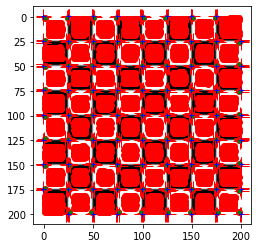

In [10]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

# Harris Corner
ax.plot(coords[:, 1], coords[:, 0], color='red', marker='o', linestyle='None', markersize=6)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)

# Shi tomasi corner
ax.plot(coordshi[:, 1], coordshi[:, 0], color='green', marker='o', linestyle='None', markersize=3)
ax.plot(coords_subpixshi[:, 1], coords_subpixshi[:, 0], '+b', markersize=5)

plt.show()

**Ερώτημα 3:**

a)

b)

c)

**Ερώτημα 4:**

a)

b)

c)

d)

**Ερώτημα 5:**

a)